<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="UTF-8">
<meta name="viewport" content="width=device-width, initial-scale=1.0">
<style>
    h1 {
        line-height: 200%;
        font-family: 'Comic Sans MS', cursive, sans-serif;
        color: #ffb6c1; /* رنگ نارنجی پاستیلی */
    }
</style>
</head>
<body>
    <h1>Zahra Alinaghipour</h1>
</body>
</html>

You might not believe it, but in some countries around the world, the opinions of travelers matter to airlines and travel service providers so that they can use them to improve their services! 😯

In this project, we aim to build a model using data related to passengers' satisfaction with the services provided by airlines, which can predict the passengers' final opinion, i.e., satisfaction or dissatisfaction.

| <b>Column</b> | <b>Description</b> |
| :---: | :---: |
| <code>Gender</code> | Passenger's gender |
| <code>Customer Type</code> | Type of passenger (in terms of loyalty) |
| <code>Age</code> | Passenger's age |
| <code>Type of Travel</code> | Type of travel (business or leisure) |
| <code>Class</code> | Flight class |
| <code>Flight Distance</code> | Flight distance |
| <code>Inflight wifi service</code> | Satisfaction with inflight Wi-Fi services (0 meaning no opinion - from 1 to 5) |
| <code>Departure/Arrival time convenient</code> | Satisfaction with departure/arrival times (0 meaning no opinion - from 1 to 5) |
| <code>Ease of Online booking</code> | Satisfaction with ease of online booking (0 meaning no opinion - from 1 to 5) |
| <code>Gate location</code> | Satisfaction with gate location (0 meaning no opinion - from 1 to 5) |
| <code>Food and drink</code> | Satisfaction with food and drinks offered (0 meaning no opinion - from 1 to 5) |
| <code>Online boarding</code> | Satisfaction with online boarding (0 meaning no opinion - from 1 to 5) |
| <code>Seat comfort</code> | Satisfaction with seat comfort (0 meaning no opinion - from 1 to 5) |
| <code>Inflight entertainment</code> | Satisfaction with inflight entertainment (0 meaning no opinion - from 1 to 5) |
| <code>On-board service</code> | Satisfaction with onboard services (0 meaning no opinion - from 1 to 5) |
| <code>Leg room service</code> | Satisfaction with leg room (0 meaning no opinion - from 1 to 5) |
| <code>Baggage handling</code> | Satisfaction with baggage handling services (0 meaning no opinion - from 1 to 5) |
| <code>Checkin service</code> | Satisfaction with check-in services (0 meaning no opinion - from 1 to 5) |
| <code>Inflight service</code> | Satisfaction with inflight services (0 meaning no opinion - from 1 to 5) |
| <code>Cleanliness</code> | Satisfaction with aircraft cleanliness (0 meaning no opinion - from 1 to 5) |
| <code>Departure Delay in Minutes</code> | Departure delay (in minutes) |
| <code>Arrival Delay in Minutes</code> | Arrival delay (in minutes) |
| <code>satisfaction</code> | Passenger satisfaction (satisfied: <code>satisfied</code>, neutral or dissatisfied: <code>neutral or dissatisfied</code>) |

In [ ]:
!pip install keras --upgrade

In [2]:
import pandas as pd
import numpy

In [6]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [8]:
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,46021,84772,Male,Loyal Customer,44,Business travel,Business,3028,2,2,...,4,4,4,4,3,4,5,6,5.0,satisfied
1,94940,120186,Male,Loyal Customer,42,Business travel,Business,1325,2,1,...,2,2,2,2,5,2,4,0,0.0,satisfied
2,3013,105475,Female,Loyal Customer,42,Business travel,Business,3336,3,2,...,4,4,4,4,5,4,4,0,0.0,satisfied
3,72514,73109,Female,Loyal Customer,60,Business travel,Business,2174,1,5,...,1,1,1,1,3,1,1,0,0.0,neutral or dissatisfied
4,60418,49438,Female,Loyal Customer,43,Business travel,Eco,421,5,1,...,3,3,5,3,4,3,5,0,0.0,satisfied


In [ ]:
train.tail()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103899,32877,38758,Female,disloyal Customer,41,Business travel,Business,353,4,4,...,1,2,1,4,1,3,1,0,0.0,neutral or dissatisfied
103900,45365,55650,Female,Loyal Customer,27,Business travel,Business,315,2,2,...,4,5,2,5,4,5,4,116,130.0,satisfied
103901,3736,77841,Male,Loyal Customer,25,Business travel,Business,1579,3,3,...,5,5,5,4,5,5,5,240,280.0,satisfied
103902,16281,109370,Male,Loyal Customer,10,Business travel,Business,1826,2,2,...,2,1,3,3,4,3,2,20,0.0,neutral or dissatisfied
103903,9979,42888,Male,Loyal Customer,36,Business travel,Eco,200,4,5,...,4,2,3,4,5,5,4,0,0.0,satisfied


In [9]:
test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,11497,119916,Male,Loyal Customer,36,Business travel,Business,2137,3,5,...,3,3,3,3,3,2,3,2,14,0.0
1,18718,84653,Male,Loyal Customer,21,Personal Travel,Eco,363,4,4,...,2,2,4,5,4,5,4,2,0,0.0
2,15665,122311,Female,disloyal Customer,28,Business travel,Business,541,3,3,...,4,3,4,2,4,5,5,3,1,6.0
3,4515,18784,Male,Loyal Customer,50,Business travel,Business,3468,5,5,...,2,4,4,4,4,5,4,4,2,0.0
4,8102,83735,Male,Loyal Customer,60,Business travel,Business,1183,2,1,...,3,2,2,2,2,3,2,3,3,28.0


In [10]:
print("The number of samples into the train data is {}.".format(train.shape[0]))
print("The number of samples into the test data is {}.".format(test.shape[0]))

The number of samples into the train data is 103904.
The number of samples into the test data is 25976.


In [11]:
# remove Unnamed: 0 and id because they are not useful
train = train.drop(['Unnamed: 0', 'id'], axis=1)
test = test.drop(['Unnamed: 0', 'id'], axis=1)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [13]:
# label encode the target variable (satisfaction)
target_to_label = {'neutral or dissatisfied': 0, 'satisfied': 1}
label_to_target = {target_to_label[key]: key for key in target_to_label}

train['satisfaction'] = train['satisfaction'].map(target_to_label)

In [14]:
category_columns = ['Type of Travel', 'Customer Type', 'Class']
for col in category_columns:
    print(train[col].value_counts())
    print('-'*50)

Type of Travel
Business travel    71655
Personal Travel    32249
Name: count, dtype: int64
--------------------------------------------------
Customer Type
Loyal Customer       84923
disloyal Customer    18981
Name: count, dtype: int64
--------------------------------------------------
Class
Business    49665
Eco         46745
Eco Plus     7494
Name: count, dtype: int64
--------------------------------------------------


In [15]:
type_to_label = {'Personal Travel': 0, 'Business travel': 1}
label_to_type = {type_to_label[key]: key for key in type_to_label}
train['Type of Travel'] = train['Type of Travel'].map(type_to_label)
test['Type of Travel'] = test['Type of Travel'].map(type_to_label)

In [16]:
customer_to_label = {'disloyal Customer': 0, 'Loyal Customer': 1}
label_to_customer = {customer_to_label[key]: key for key in customer_to_label}
train['Customer Type'] = train['Customer Type'].map(customer_to_label)
test['Customer Type'] = test['Customer Type'].map(customer_to_label)

In [17]:
# The typical order of a flight class is the following: Eco < Eco Plus < Business
# Economy Class (Eco): The most basic and affordable class
# Economy Plus (Eco Plus): An optional class offered by some airlines. It provides slightly better service than Economy Class (such as more legroom, priority boarding, etc.)
# Business Class: The highest class available, replete with the best service and most expensive tickets

class_to_label = {'Eco': 0, 'Eco Plus': 1, 'Business': 2}
label_to_class = {class_to_label[key]: key for key in class_to_label}
train['Class'] = train['Class'].map(class_to_label)
test['Class'] = test['Class'].map(class_to_label)

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  int64  
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  int64  
 4   Class                              103904 non-null  int64  
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [19]:
train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,1,44,1,2,3028,2,2,2,2,...,4,4,4,4,3,4,5,6,5.0,1
1,Male,1,42,1,2,1325,2,1,2,2,...,2,2,2,2,5,2,4,0,0.0,1
2,Female,1,42,1,2,3336,3,2,3,3,...,4,4,4,4,5,4,4,0,0.0,1
3,Female,1,60,1,2,2174,1,5,5,5,...,1,1,1,1,3,1,1,0,0.0,0
4,Female,1,43,1,0,421,5,1,1,1,...,3,3,5,3,4,3,5,0,0.0,1


In [20]:
# we encode Gender using binary encoding because if we use one-hot encoding, we will have two columns which are correlated
gender_to_label = {'Male': 0, 'Female': 1}
label_to_gender = {gender_to_label[key]: key for key in gender_to_label}
train['Gender'] = train['Gender'].map(gender_to_label)
test['Gender'] = test['Gender'].map(gender_to_label)

In [21]:
train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,1,44,1,2,3028,2,2,2,2,...,4,4,4,4,3,4,5,6,5.0,1
1,0,1,42,1,2,1325,2,1,2,2,...,2,2,2,2,5,2,4,0,0.0,1
2,1,1,42,1,2,3336,3,2,3,3,...,4,4,4,4,5,4,4,0,0.0,1
3,1,1,60,1,2,2174,1,5,5,5,...,1,1,1,1,3,1,1,0,0.0,0
4,1,1,43,1,0,421,5,1,1,1,...,3,3,5,3,4,3,5,0,0.0,1


In [22]:
train.describe()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,...,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000,103904.000000
mean,0.507459,0.817322,39.379706,0.689627,1.028103,1189.448375,2.729683,3.060296,2.756901,2.976883,...,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678,0.433333
std,0.499947,0.386404,15.114964,0.462649,0.962858,997.147281,1.327829,1.525075,1.398929,1.277621,...,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682,0.495538
min,0.000000,0.000000,7.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,27.000000,0.000000,0.000000,414.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,40.000000,1.000000,1.000000,843.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,51.000000,1.000000,2.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,1.000000,1.000000,85.000000,1.000000,2.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000


In [23]:
# check if the target variable is balanced
train['satisfaction'].value_counts()

satisfaction
0    58879
1    45025
Name: count, dtype: int64

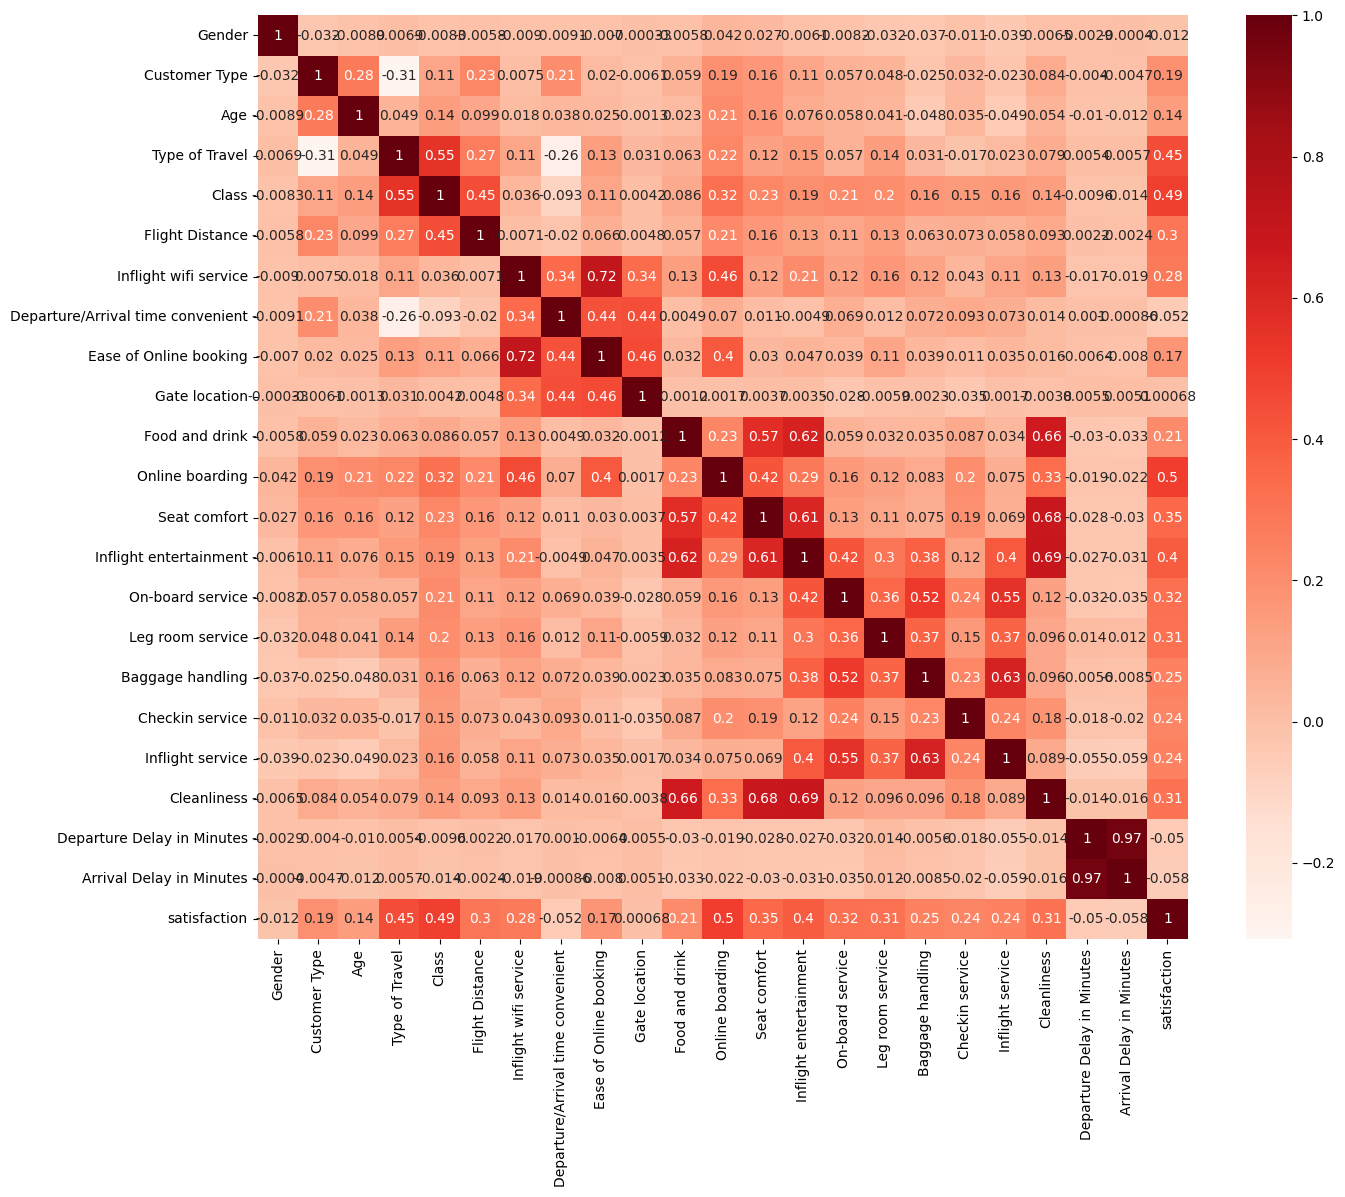

In [24]:
# plot the correlation matrix heatmap
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 12))
cor = train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

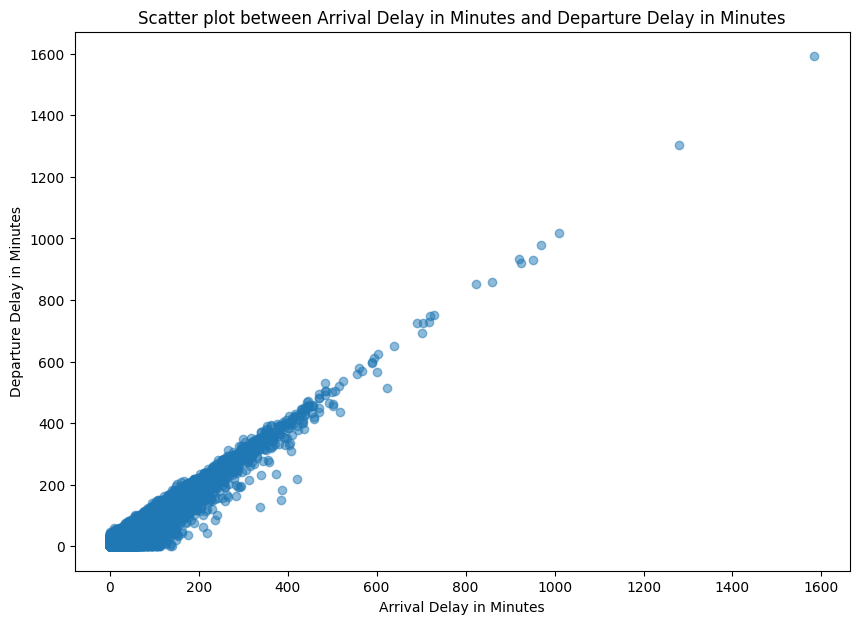

In [25]:
# let's analyze the correlation between Arrival Delay in Minutes and Departure Delay in Minutes using a scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(train['Arrival Delay in Minutes'], train['Departure Delay in Minutes'], alpha=0.5)
plt.title('Scatter plot between Arrival Delay in Minutes and Departure Delay in Minutes')
plt.xlabel('Arrival Delay in Minutes')
plt.ylabel('Departure Delay in Minutes')
plt.show()

In [26]:
# As we can see from the scatter plot, there is a strong linear relationship between Arrival Delay in Minutes and Departure Delay in Minutes
# so, we can drop one of them. Which one should we drop? Let's decide based on the missing values in each column.
# If both columns have missing values, we can first build a regression model to predict the missing values in one column using the other column.
# However, if only one column has missing values, we can drop the column with missing values.

train.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [27]:
# As the Departure Delay in Minutes column has no missing values, we can drop the Arrival Delay in Minutes column
train = train.drop('Arrival Delay in Minutes', axis=1)
test = test.drop('Arrival Delay in Minutes', axis=1)

In [28]:
train.duplicated().sum()

0

In [29]:
len(train.columns)

22

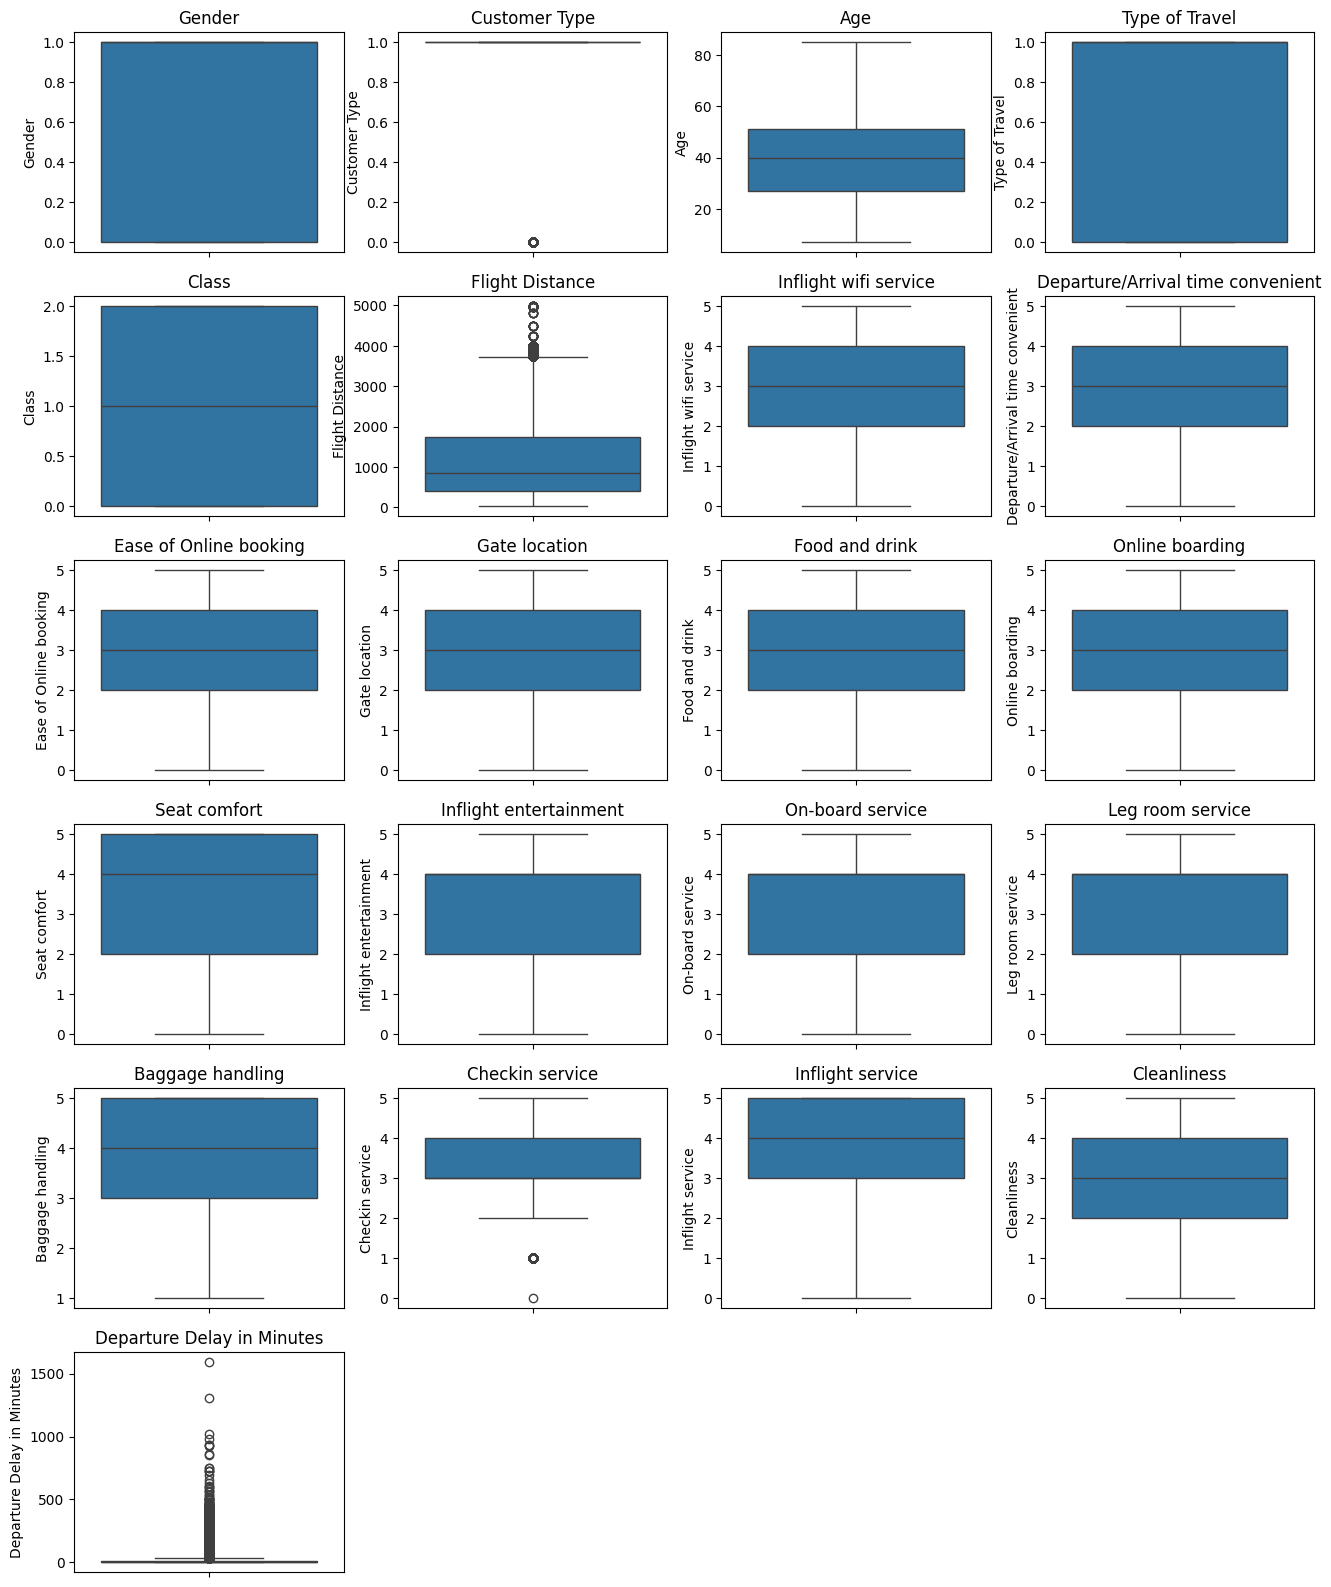

In [30]:
# show box plot for each feature in a single subplot
plt.figure(figsize=(16, 20))
for i, col in enumerate(train.columns):
    if col != 'satisfaction':
        plt.subplot(6, 4, i+1)
        sns.boxplot(train[col])
        plt.title(col)
plt.show()

In [31]:
# find how many outliers are there in each column
for col in train.columns:
    if col != 'satisfaction':
        q1 = train[col].quantile(0.25)
        q3 = train[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        num_outliers = len(train[(train[col] < lower_bound) | (train[col] > upper_bound)])
        print("{} ---> {} outliers [Lower bound: {}, Upper bound: {}]".format(col, num_outliers, lower_bound, upper_bound))

Gender ---> 0 outliers [Lower bound: -1.5, Upper bound: 2.5]
Customer Type ---> 18981 outliers [Lower bound: 1.0, Upper bound: 1.0]
Age ---> 0 outliers [Lower bound: -9.0, Upper bound: 87.0]
Type of Travel ---> 0 outliers [Lower bound: -1.5, Upper bound: 2.5]
Class ---> 0 outliers [Lower bound: -3.0, Upper bound: 5.0]
Flight Distance ---> 2291 outliers [Lower bound: -1579.5, Upper bound: 3736.5]
Inflight wifi service ---> 0 outliers [Lower bound: -1.0, Upper bound: 7.0]
Departure/Arrival time convenient ---> 0 outliers [Lower bound: -1.0, Upper bound: 7.0]
Ease of Online booking ---> 0 outliers [Lower bound: -1.0, Upper bound: 7.0]
Gate location ---> 0 outliers [Lower bound: -1.0, Upper bound: 7.0]
Food and drink ---> 0 outliers [Lower bound: -1.0, Upper bound: 7.0]
Online boarding ---> 0 outliers [Lower bound: -1.0, Upper bound: 7.0]
Seat comfort ---> 0 outliers [Lower bound: -2.5, Upper bound: 9.5]
Inflight entertainment ---> 0 outliers [Lower bound: -1.0, Upper bound: 7.0]
On-board 

In [32]:
# split the data into features and target variable
X = train.drop('satisfaction', axis=1)
y = train['satisfaction']

In [33]:
# split the data into training and validation sets
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [34]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(test)

In [35]:
# baseline model 1: k-Nearest Neighbors (KNN)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_val)

print("Accuracy of KNN model on validation set: {:.2f}%".format(accuracy_score(y_val, y_pred) * 100))

Accuracy of KNN model on validation set: 92.83%


In [36]:
# baseline model 2: Random Forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)

print("Accuracy of Random Forest model on validation set: {:.2f}%".format(accuracy_score(y_val, y_pred) * 100))

Accuracy of Random Forest model on validation set: 96.16%


In [37]:
import keras

model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
early_stopping_cb = keras.callbacks.EarlyStopping(patience=15, restore_best_weights=True, monitor='val_accuracy')

history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val), batch_size=32,
                    epochs=100, callbacks=[early_stopping_cb])

Epoch 1/100
2598/2598 [==============================] - 9s 3ms/step - loss: 0.2503 - accuracy: 0.8979 - val_loss: 0.1625 - val_accuracy: 0.9363
Epoch 2/100
2598/2598 [==============================] - 6s 2ms/step - loss: 0.1600 - accuracy: 0.9356 - val_loss: 0.1465 - val_accuracy: 0.9398
Epoch 3/100
2598/2598 [==============================] - 7s 3ms/step - loss: 0.1408 - accuracy: 0.9427 - val_loss: 0.1275 - val_accuracy: 0.9465
Epoch 4/100
2598/2598 [==============================] - 7s 3ms/step - loss: 0.1321 - accuracy: 0.9458 - val_loss: 0.1268 - val_accuracy: 0.9462
Epoch 5/100
2598/2598 [==============================] - 7s 3ms/step - loss: 0.1268 - accuracy: 0.9482 - val_loss: 0.1192 - val_accuracy: 0.9499
Epoch 6/100
2598/2598 [==============================] - 7s 3ms/step - loss: 0.1201 - accuracy: 0.9512 - val_loss: 0.1169 - val_accuracy: 0.9513
Epoch 7/100
2598/2598 [==============================] - 7s 3ms/step - loss: 0.1167 - accuracy: 0.9517 - val_loss: 0.1096 - val_ac

In [38]:
_, accuracy = model.evaluate(X_val, y_val, verbose=0)
print("Accuracy of the model on validation set: {:.2f}%".format(accuracy * 100))

Accuracy of the model on validation set: 96.17%


In [39]:
test_pred = model.predict(X_test)
test_pred = (test_pred > 0.5).astype(int)

812/812 [==============================] - 1s 1ms/step


In [40]:
test_pred = pd.Series(test_pred.reshape(-1)).map(label_to_target)
submission = pd.DataFrame({'satisfaction': test_pred})
submission

,satisfaction
0,neutral or dissatisfied
1,neutral or dissatisfied
2,neutral or dissatisfied
3,satisfied
4,neutral or dissatisfied
...,...
25971,neutral or dissatisfied
25972,satisfied
25973,satisfied
25974,neutral or dissatisfied
